# Explonatary Data Analysis

## 1.0 Business Questions

List of questions to ask yourself before execute any plan:
1. The average comapny_rating score all the company in Malaysia.
2. The highest company_rating score by company_employee_num.
3. The frequency distribution of the company rating.
4. The most common company_benefit.
5. The number of companies distributed by state.
6. etc


In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

/Users/nickytan/opt/anaconda3/envs/capstone1/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
df = pd.read_csv("/Users/nickytan/Documents/FS_Data_Science/Capstone_project/JobRev/common/util/company_list_state_classified.csv", index_col="Unnamed: 0")

df.head()

,company_name,company_rating,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,salary_rate,recommendation_rate,company_address,company_state,company_employee_num,company_benefit,company_dress_code,company_language,company_work_hours
0,Petroliam Nasional Berhad (PETRONAS),4.5584,1427,336,109,37,50,94%,88%,"level 3, menara dayabumi\njalan sultan hishamu...",Kuala Lumpur,> 5000,Medical,Business (e.g. Shirts),English,"Regular hours, Mondays - Fridays"
1,Malayan Banking Berhad (Maybank),4.3470,1081,437,139,38,83,92%,87%,menara maybank jalan tun perak kuala lumpur wi...,Perak,> 5000,"Medical, Miscellaneous allowance, Education su...",Formal (e.g. Shirts + Ties),English,"Regular hours, Mondays - Fridays"
2,Keysight Technologies Malaysia Sdn. Bhd.,4.5613,904,299,64,14,26,94%,94%,"bayan lepas free industrial zone, 11900 penang...",Penang,2001 - 5000,"Medical, Education support, Loans, Dental, Spo...",Smart Casual,English,"Regular hours, Mondays - Fridays"
3,United Overseas Bank (Malaysia) Bhd,4.6111,920,276,48,11,23,97%,93%,menara uob jalan raja laut kuala lumpur wilaya...,Kuala Lumpur,2001 - 5000,"Medical, Loans, Dental, Optical",Formal (e.g. Shirts + Ties),English,"Regular hours, Mondays - Fridays"
4,Kumpulan Wang Simpanan Pekerja (KWSP),4.4548,783,171,113,26,35,95%,78%,"bangunan kwsp, jalan raja laut, 50350 kuala lu...",Kuala Lumpur,> 5000,"Medical, Miscellaneous allowance, Education su...",Business Casual,Bahasa Malaysia / English,"Regular hours, Mondays - Fridays"


In [10]:
df.shape

(7460, 16)

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(6915, 16)

In [35]:
df["salary_rate"] = df["salary_rate"].apply(lambda x : int(x.split("%")[0]))
df["recommendation_rate"] = df["recommendation_rate"].apply(lambda x : int(x.split("%")[0]))
df["company_employee_num"] = df["company_employee_num"].apply(lambda x : x.strip())

In [6]:
df.describe()

,company_rating,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,salary_rate,recommendation_rate
count,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000
mean,3.596714,13.953619,8.089410,4.177346,1.886729,4.270777,79.408311,63.771716
std,0.742846,39.722178,17.843457,8.315588,3.280621,7.406286,16.481999,21.671777
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.204400,4.000000,2.000000,1.000000,0.000000,1.000000,72.000000,50.000000
50%,3.750000,6.000000,4.000000,2.000000,1.000000,2.000000,83.000000,67.000000
75%,4.125000,12.000000,8.000000,4.000000,2.000000,5.000000,91.000000,80.000000
max,5.000000,1427.000000,437.000000,165.000000,66.000000,160.000000,111.000000,100.000000


### 2.1 Distribution of Numeric Features

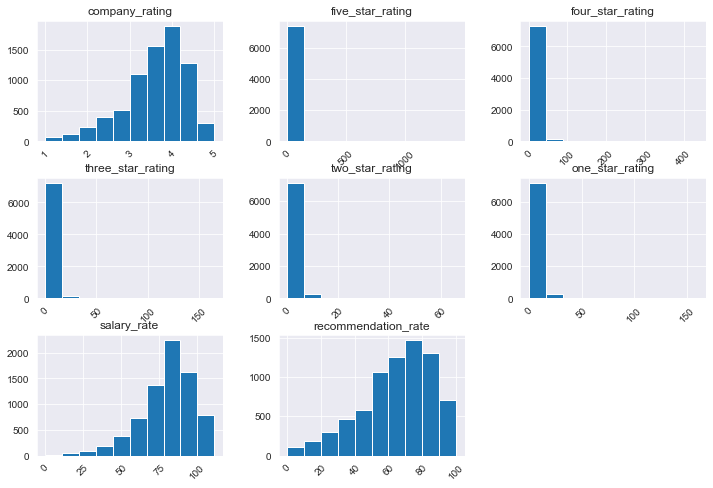

In [7]:
df.hist(figsize=(12,8), xrot=45)
plt.show()

In [20]:
for feature in df.dtypes[df.dtypes == "object"].drop(["company_name","company_address"]).index:
    print(feature, df[feature].nunique())

company_state 12
company_employee_num 7
company_benefit 2824
company_dress_code 591
company_language 358
company_work_hours 1388


Need to do a lot of sparse group for the categorical variable

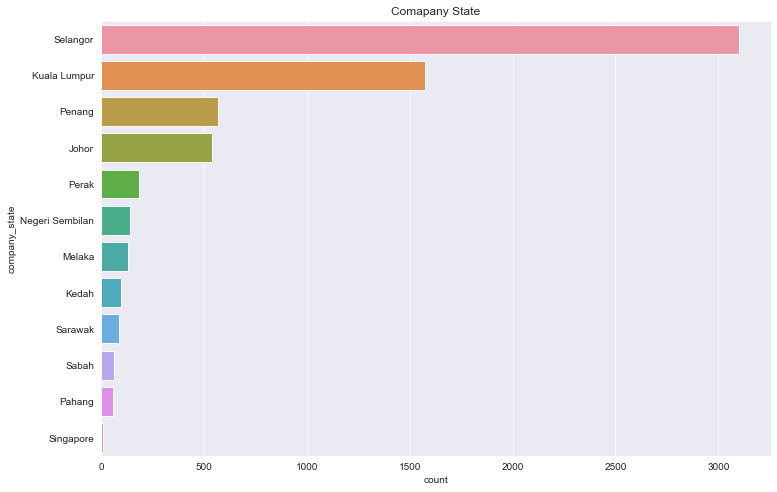

In [27]:
plt.figure(figsize=(12,8))

plt.title("Comapany State")

sns.countplot(y=df["company_state"], order = df['company_state'].value_counts().index)
plt.show()

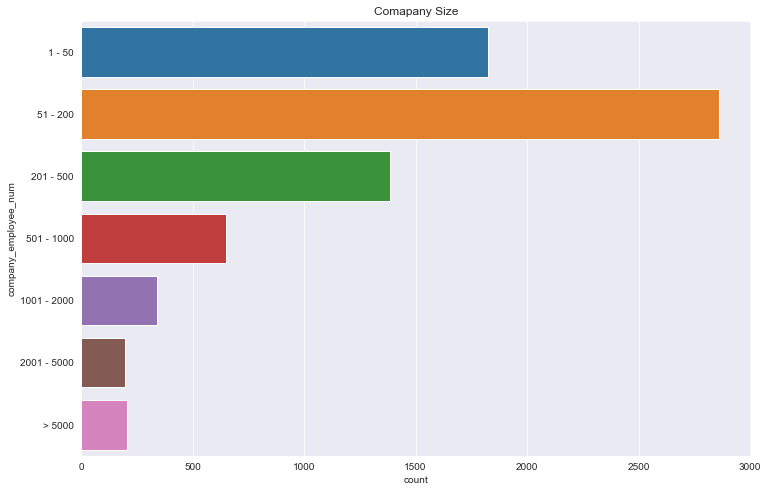

In [36]:
order = ["1 - 50", "51 - 200", "201 - 500", "501 - 1000", "1001 - 2000", "2001 - 5000", "> 5000"]


plt.figure(figsize=(12,8))

plt.title("Comapany Size")

sns.countplot(y=df["company_employee_num"], order = order)
plt.show()

In [37]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()